In [1]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

After you run the first cell (the the cell directly above this text), go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.6* in Runtime type. You can also select your prefered harwdware acceleration (defaults to GPU). 

<br/>You should see something like this:

> ![Colab Img](https://raw.githubusercontent.com/Dsantra92/Julia-on-Colab/master/misc/julia_menu.png)

<br/>Click on SAVE
<br/>**We are ready to get going**





In [1]:
VERSION

v"1.6.1"

**The next three cells are for GPU benchmarking. If you are using this notebook for the first time and have GPU enabled, you can give it a try.** 

### Optional GPU Experiments

In [2]:
using Pkg
Pkg.add(["BenchmarkTools", "CUDA"])
using BenchmarkTools, CUDA

if has_cuda_gpu()
  print("The GPU device is:", CUDA.device())
end

The GPU device is:CuDevice(0)

In [3]:
mcpu = rand(2^10, 2^10)
@benchmark mcpu*mcpu

BenchmarkTools.Trial: 
  memory estimate:  8.00 MiB
  allocs estimate:  2
  --------------
  minimum time:     51.256 ms (0.00% GC)
  median time:      54.219 ms (0.00% GC)
  mean time:        55.329 ms (0.68% GC)
  maximum time:     82.020 ms (0.00% GC)
  --------------
  samples:          91
  evals/sample:     1

In [4]:
println("The CuArrray operation should take around 0.5 ms(excluding CUDA downloading time which is a one time process), and should be much faster. If so, the GPU is working.")
mgpu = cu(mcpu)
@benchmark CUDA.@sync mgpu*mgpu

The CuArrray operation should take around 0.5 ms(excluding CUDA downloading time which is a one time process), and should be much faster. If so, the GPU is working.


BenchmarkTools.Trial: 
  memory estimate:  7.55 KiB
  allocs estimate:  458
  --------------
  minimum time:     351.586 μs (0.00% GC)
  median time:      523.014 μs (0.00% GC)
  mean time:        533.007 μs (0.48% GC)
  maximum time:     14.080 ms (58.29% GC)
  --------------
  samples:          9298
  evals/sample:     1

In [5]:
Pkg.add(["Flux", "Plots"])

In [7]:
using Plots

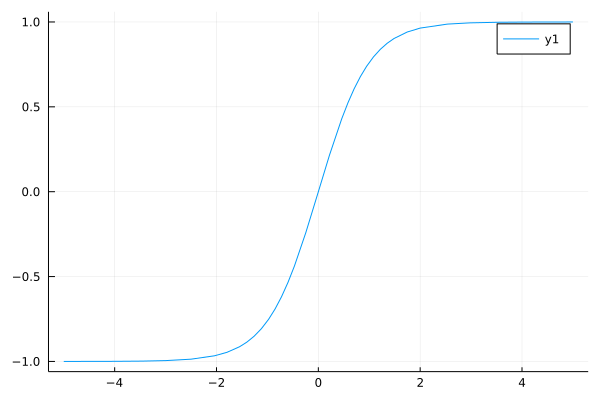

In [9]:
plot(tanh)